## Imports

In [47]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## Data 

In [48]:
X = np.linspace(0, 20, 100)

In [49]:
X

array([ 0.        ,  0.2020202 ,  0.4040404 ,  0.60606061,  0.80808081,
        1.01010101,  1.21212121,  1.41414141,  1.61616162,  1.81818182,
        2.02020202,  2.22222222,  2.42424242,  2.62626263,  2.82828283,
        3.03030303,  3.23232323,  3.43434343,  3.63636364,  3.83838384,
        4.04040404,  4.24242424,  4.44444444,  4.64646465,  4.84848485,
        5.05050505,  5.25252525,  5.45454545,  5.65656566,  5.85858586,
        6.06060606,  6.26262626,  6.46464646,  6.66666667,  6.86868687,
        7.07070707,  7.27272727,  7.47474747,  7.67676768,  7.87878788,
        8.08080808,  8.28282828,  8.48484848,  8.68686869,  8.88888889,
        9.09090909,  9.29292929,  9.49494949,  9.6969697 ,  9.8989899 ,
       10.1010101 , 10.3030303 , 10.50505051, 10.70707071, 10.90909091,
       11.11111111, 11.31313131, 11.51515152, 11.71717172, 11.91919192,
       12.12121212, 12.32323232, 12.52525253, 12.72727273, 12.92929293,
       13.13131313, 13.33333333, 13.53535354, 13.73737374, 13.93

In [50]:
a = -1
b = 2
Y = a * X + b

In [51]:
Y

array([  2.        ,   1.7979798 ,   1.5959596 ,   1.39393939,
         1.19191919,   0.98989899,   0.78787879,   0.58585859,
         0.38383838,   0.18181818,  -0.02020202,  -0.22222222,
        -0.42424242,  -0.62626263,  -0.82828283,  -1.03030303,
        -1.23232323,  -1.43434343,  -1.63636364,  -1.83838384,
        -2.04040404,  -2.24242424,  -2.44444444,  -2.64646465,
        -2.84848485,  -3.05050505,  -3.25252525,  -3.45454545,
        -3.65656566,  -3.85858586,  -4.06060606,  -4.26262626,
        -4.46464646,  -4.66666667,  -4.86868687,  -5.07070707,
        -5.27272727,  -5.47474747,  -5.67676768,  -5.87878788,
        -6.08080808,  -6.28282828,  -6.48484848,  -6.68686869,
        -6.88888889,  -7.09090909,  -7.29292929,  -7.49494949,
        -7.6969697 ,  -7.8989899 ,  -8.1010101 ,  -8.3030303 ,
        -8.50505051,  -8.70707071,  -8.90909091,  -9.11111111,
        -9.31313131,  -9.51515152,  -9.71717172,  -9.91919192,
       -10.12121212, -10.32323232, -10.52525253, -10.72

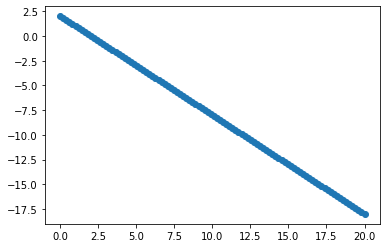

In [52]:
plt.scatter(X,Y, marker='o')
plt.show()

## 1 - Adagrad

In [53]:
def adagrad(X, Y, alpha= 100000000, epsilon= 0.00001, threshold = 0.0001, iterat=1000):
    
    theta_0 = theta_1 = 0.0
    v0 = v1 = 0.0
    iterations = 0
    
    m = len(X)
    
    theta_0_values = []
    theta_1_values = []
    cost = []
    
    for i in range(iterat): 
        
        ypred = theta_0 + theta_1 * X
        error = ypred - Y
        
        cost_value = np.sum(error ** 2) / (2 * m)
        cost.append(cost_value)
        
        theta_0_grad = (np.sum(error)) / m
        theta_1_grad = (error @ X) / m
        
        v0 = v0 + np.square(theta_0_grad)
        v1 = v1 + np.square(theta_1_grad)
        
        theta_0 = theta_0 -((alpha * theta_0_grad) / (np.sqrt(v0) + epsilon))
        theta_1 = theta_1 - ((alpha  * theta_1_grad)/ (np.sqrt(v1) + epsilon))
        
        theta_0_values.append(theta_0)
        theta_1_values.append(theta_1)
        
        iterations += 1
        
        if np.abs(cost[i] - cost[i - 1]) < threshold and i > 0:
            break
            
    return theta_0_values, theta_1_values, theta_0_values[-1], theta_1_values[-1], cost, iterations

In [54]:
theta_0_values, theta_1_values, theta_0_opt, theta_1_opt, cost, iterations = adagrad(X,Y)

print("[ ", theta_0_opt, ",", theta_1_opt, " ]")
print("Takes: ", iterations, " Iterations")

[  2.1287320723349215 , -1.009833240134264  ]
Takes:  311  Iterations


In [55]:
from sklearn.metrics import r2_score
y_pred =  theta_0_opt + theta_1_opt * X
accuracy = r2_score(Y, y_pred) * 100

print("Accuracy:" , accuracy, "%")

Accuracy: 99.98761321826261 %


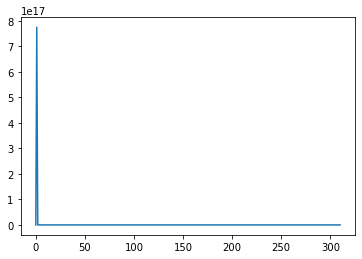

In [56]:
plt.plot(np.arange(iterations), cost)
plt.show()

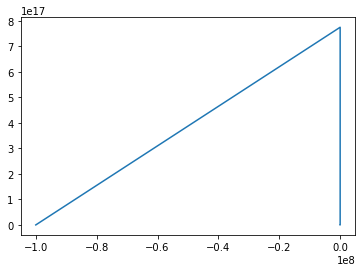

In [57]:
plt.plot(theta_0_values, cost)
plt.show()

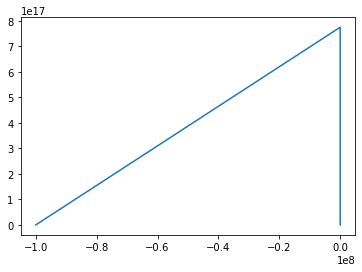

In [58]:
plt.plot(theta_1_values, cost)
plt.show()

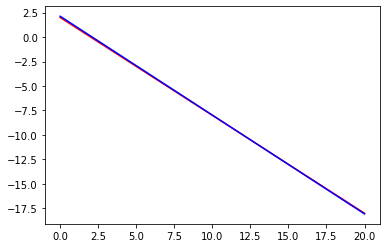

In [59]:
plt.plot(X,Y, 'r')
y_pred =  theta_0_opt + theta_1_opt * X
plt.plot(X, y_pred, 'b')
plt.show()

## 2- RMS

In [80]:
def rms(X, Y, alpha= 0.01, beta= 0.5, epsilon= 0.0001, threshold = 0.0001, iterat=1000):
    
    theta_0 = theta_1 = 0.0
    v0 = v1 = 0.0
    iterations = 0
    
    m = len(X)
    
    theta_0_values = []
    theta_1_values = []
    cost = []
    
    for i in range(iterat): 
        
        ypred = theta_0 + theta_1 * X
        error = ypred - Y
        
        cost_value = np.sum(error ** 2) / (2 * m)
        cost.append(cost_value)
        
        theta_0_grad = (np.sum(error)) / m
        theta_1_grad = (error @ X) / m
        
        v0 = (beta * v0) + ((1 - beta) * np.square(theta_0_grad))
        v1 = (beta * v1) + ((1 - beta) * np.square(theta_1_grad))
        
        theta_0 = theta_0 -((alpha * theta_0_grad) / (np.sqrt(v0) + epsilon))
        theta_1 = theta_1 - ((alpha  * theta_1_grad)/ (np.sqrt(v1) + epsilon))
        
        theta_0_values.append(theta_0)
        theta_1_values.append(theta_1)
        
        iterations += 1
        
        if np.abs(cost[i] - cost[i - 1]) < threshold and i > 0:
            break
            
    return theta_0_values, theta_1_values, theta_0_values[-1], theta_1_values[-1], cost, iterations

In [81]:
theta_0_values, theta_1_values, theta_0_opt, theta_1_opt, cost, iterations = rms(X,Y)

print("[ ", theta_0_opt, ",", theta_1_opt, " ]")
print("Takes: ", iterations, " Iterations")

[  1.8492563892507994 , -0.9937783901177433  ]
Takes:  352  Iterations


In [82]:
from sklearn.metrics import r2_score
y_pred =  theta_0_opt + theta_1_opt * X
accuracy = r2_score(Y, y_pred) * 100

print("Accuracy:" , accuracy, "%")

Accuracy: 99.97308336745054 %


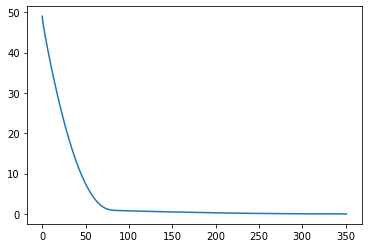

In [83]:
plt.plot(np.arange(iterations), cost)
plt.show()

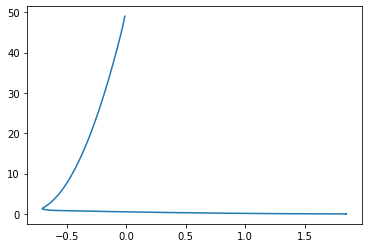

In [84]:
plt.plot(theta_0_values, cost)
plt.show()

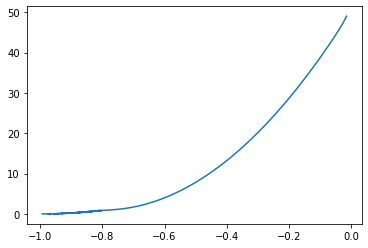

In [85]:
plt.plot(theta_1_values, cost)
plt.show()

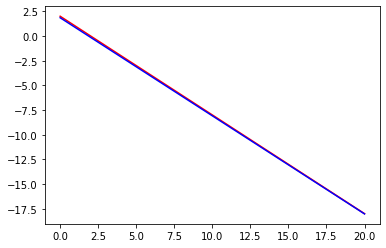

In [86]:
plt.plot(X,Y, 'r')
y_pred =  theta_0_opt + theta_1_opt * X
plt.plot(X, y_pred, 'b')
plt.show()

## 3 - ADAM

In [87]:
def adam(X, Y, alpha= 0.01, beta= 0.5, epsilon= 0.0001, threshold = 0.0001, iterat=1000):
    
    theta_0 = theta_1 = 0.0
    v0 = v1 = 0.0
    mt0 = mt1 = 0.0
    iterations = 0
    
    m = len(X)
    
    theta_0_values = []
    theta_1_values = []
    cost = []
    
    for i in range(iterat): 
        
        ypred = theta_0 + theta_1 * X
        error = ypred - Y
        
        cost_value = np.sum(error ** 2) / (2 * m)
        cost.append(cost_value)
        
        theta_0_grad = (np.sum(error)) / m
        theta_1_grad = (error @ X) / m
        
        mt0 = (beta * mt0) + (1 - beta) * theta_0_grad
        mt1 = (beta * mt1) + (1 - beta) * theta_1_grad
        
        v0 = (beta * v0) + ((1 - beta) * np.square(theta_0_grad))
        v1 = (beta * v1) + ((1 - beta) * np.square(theta_1_grad))
        
        theta_0 = theta_0 -((alpha * mt0) / (np.sqrt(v0) + epsilon))
        theta_1 = theta_1 - ((alpha  * mt1)/ (np.sqrt(v1) + epsilon))
        
        theta_0_values.append(theta_0)
        theta_1_values.append(theta_1)
        
        iterations += 1
        
        if np.abs(cost[i] - cost[i - 1]) < threshold and i > 0:
            break
            
    return theta_0_values, theta_1_values, theta_0_values[-1], theta_1_values[-1], cost, iterations

In [89]:
theta_0_values, theta_1_values, theta_0_opt, theta_1_opt, cost, iterations = adam(X,Y)

print("[ ", theta_0_opt, ",", theta_1_opt, " ]")
print("Takes: ", iterations, " Iterations")

[  1.860996772879648 , -0.9865372553166877  ]
Takes:  337  Iterations


In [90]:
from sklearn.metrics import r2_score
y_pred =  theta_0_opt + theta_1_opt * X
accuracy = r2_score(Y, y_pred) * 100

print("Accuracy:" , accuracy, "%")

Accuracy: 99.98181914567229 %


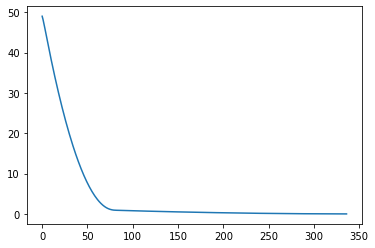

In [91]:
plt.plot(np.arange(iterations), cost)
plt.show()

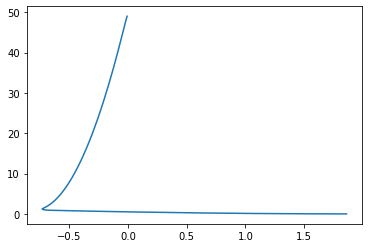

In [92]:
plt.plot(theta_0_values, cost)
plt.show()

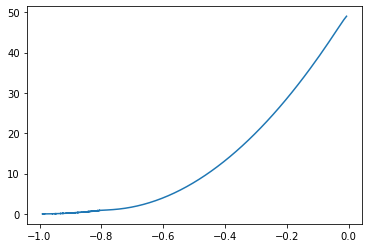

In [93]:
plt.plot(theta_1_values, cost)
plt.show()

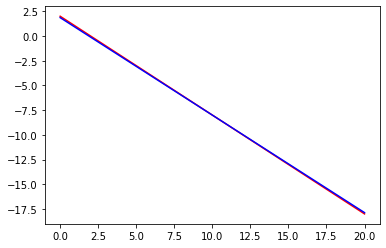

In [94]:
plt.plot(X,Y, 'r')
y_pred =  theta_0_opt + theta_1_opt * X
plt.plot(X, y_pred, 'b')
plt.show()

## 4 - Adam (Bias Correction)

In [95]:
def adam(X, Y, alpha= 0.01, beta= 0.5, epsilon= 0.0001, threshold = 0.0001, iterat=1000):
    
    theta_0 = theta_1 = 0.0
    v0 = v1 = 0.0
    mt0 = mt1 = 0.0
    iterations = 0
    
    m = len(X)
    
    theta_0_values = []
    theta_1_values = []
    cost = []
    
    for i in range(iterat): 
        
        ypred = theta_0 + theta_1 * X
        error = ypred - Y
        
        cost_value = np.sum(error ** 2) / (2 * m)
        cost.append(cost_value)
        
        theta_0_grad = (np.sum(error)) / m
        theta_1_grad = (error @ X) / m
        
        mt0 = (beta * mt0) + (1 - beta) * theta_0_grad
        mt1 = (beta * mt1) + (1 - beta) * theta_1_grad
        
        mt0 = mt0 / (1 - beta ** (i+1))
        mt1 = mt1 / (1 - beta ** (i+1))
        
        v0 = (beta * v0) + ((1 - beta) * np.square(theta_0_grad))
        v1 = (beta * v1) + ((1 - beta) * np.square(theta_1_grad))
        
        v0 = v0 / (1 - beta ** (i+1))
        v1 = v1 / (1 - beta ** (i+1))
        
        theta_0 = theta_0 -((alpha * mt0) / (np.sqrt(v0) + epsilon))
        theta_1 = theta_1 - ((alpha  * mt1)/ (np.sqrt(v1) + epsilon))
        
        theta_0_values.append(theta_0)
        theta_1_values.append(theta_1)
        
        iterations += 1
        
        if np.abs(cost[i] - cost[i - 1]) < threshold and i > 0:
            break
            
    return theta_0_values, theta_1_values, theta_0_values[-1], theta_1_values[-1], cost, iterations

In [96]:
theta_0_values, theta_1_values, theta_0_opt, theta_1_opt, cost, iterations = adam(X,Y)

print("[ ", theta_0_opt, ",", theta_1_opt, " ]")
print("Takes: ", iterations, " Iterations")

[  1.880290873921142 , -0.9878952631400927  ]
Takes:  338  Iterations


In [97]:
from sklearn.metrics import r2_score
y_pred =  theta_0_opt + theta_1_opt * X
accuracy = r2_score(Y, y_pred) * 100

print("Accuracy:" , accuracy, "%")

Accuracy: 99.9853422682658 %


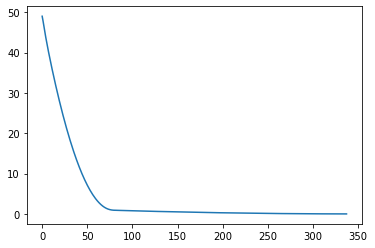

In [98]:
plt.plot(np.arange(iterations), cost)
plt.show()

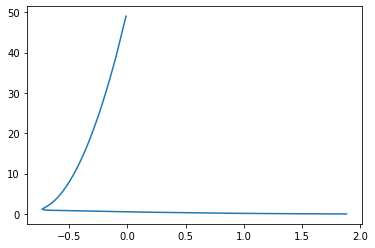

In [99]:
plt.plot(theta_0_values, cost)
plt.show()